# Load Classfier

In [33]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uzaycetin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Using our classifier
with open('mytfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)
    
with open('myclassifier.pickle','rb') as f:
    clf = pickle.load(f)
    

# Test on a new Data

In [35]:
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([1])

In [36]:
sample = ["You are a bad person man, go to hell"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([0])

# Test on Twitter

In [37]:
import json
import tweepy
import time
from tweepy import OAuthHandler


consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_token_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=3, retry_delay=60)

In [38]:
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('ID: ' + str(user.id))
print('Location: ' + user.location)

Name: Bijoyan Das
ID: 624310916
Location: Calcutta, India


In [39]:
args = ['Khashoggi'];
api = tweepy.API(auth,timeout=10)

# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [40]:
list_tweets[:4]

["@MailOnline Replace with someone who's human, not any Royal SOB!! They all are shameless barbarians... #SaudiArabia #Khashoggi",
 'Justice will be seen in the end: MBS\n\n#Jamal_Khashoggi https://t.co/XTymqtBoGW',
 "@washingtonpost Don't try to blackmail anyone.We will see how and who Khashoggi killed after the report of his deat… https://t.co/M2Uox7Frlv",
 "Khashoggi's killing was 'premeditated': Saudi PP https://t.co/ZwIQknbDB2"]

# Twitter Data Claening

In [44]:
# Preprocessing the tweets

sent_tweets = []
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    sent_tweets.append((tweet, int(sent)))

sent_tweets[:4]

[(' mailonline replace with someone who is human not any royal sob they all are shameless barbarians saudiarabia khashoggi',
  1),
 ('justice will be seen in the end mbs jamal_khashoggi ', 1),
 (' washingtonpost don try to blackmail anyone we will see how and who khashoggi killed after the report of his deat ',
  0),
 ('khashoggi killing was premeditated saudi pp ', 0)]

## Positive/negative Split

In [45]:
pos = len([s for t, s in sent_tweets if s == 1])
neg = len(sent_tweets) - pos
pos, neg

(67, 33)

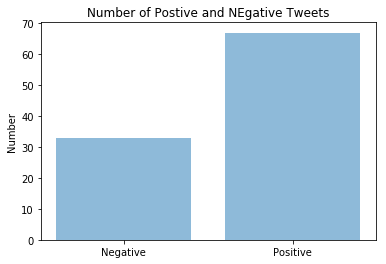

In [46]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
plt.bar(['Positive','Negative'], [pos, neg], alpha = 0.5)
#plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()

In [47]:
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([1])

In [48]:
from textblob import TextBlob

In [51]:
sample = ["You are a nice person man, have a good life"]
blob = TextBlob(sample[0])

In [53]:
blob.translate(to="tr")

TextBlob("Sen iyi bir insansın, iyi bir hayatın var")

In [97]:
sample = []
yorum = "Money Bonus kredi kartı ile 5M, Migros, Migros Jet, Kipa ve Sanal Market'ten katalogda belirtilen hem indirimli hem Money hediyeli ürünlerden yapılacak alışverişlerde belirtilen tutarda Money hediye edilecektir. Kampanyadan yararlanmak için ürün alımı yapılması yeterlidir. Kazanılan Moneyler"
blob = TextBlob(yorum)
sample.append(str(blob.translate(to="en")))

In [98]:
print(sample)

['Money will be paid to the Money Bonus credit card in the amount of 5M, Migros, Migros Jet, Kipa and Virtual Market as specified in the purchases made from both discounted and Money-gifted products in the catalog. In order to benefit from the campaign, product purchases are sufficient. Earned Money']


In [99]:
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([0])